# Exploración del Dataset

Este notebook proporciona información sobre cada .csv del dataset, contestando a estas preguntas:

- ¿Qué nos proporciona este archivo?
- ¿Qué columnas no son importantes para predicciones?
- ¿Qué predicciones puede ayudar a construir este archivo?

La estructura de este dataset és el siguiente:

- circuits.csv
- constructor_results.csv
- constructor_standings.csv 
- constructors.csv
- driver_standings.csv
- drivers.csv
- lap_times.csv
- pit_stops.csv
- qualifying.csv
- races.csv
- results.csv
- seasons.csv 
- sprint_results.csv
- status.csv

In [67]:
#Importar liberías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Circuits.csv

In [68]:
circuits_data = pd.read_csv('../data/original/circuits.csv')

print("Primeras 5 filas:")
display(circuits_data.head())

print("\nColumnas: ")
print(circuits_data.columns.tolist())

print(f"Registros: {circuits_data.shape[0]}")
print(f"Columnas: {circuits_data.shape[1]}")


Primeras 5 filas:


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park



Columnas: 
['circuitId', 'circuitRef', 'name', 'location', 'country', 'lat', 'lng', 'alt', 'url']
Registros: 77
Columnas: 9


### Análisis del archivo `circuits.csv`

1. ¿Qué nos proporciona este archivo?

Este archivo contiene información geográfica y descriptiva de cada circuito en el campeonato de F1.

La columnas principales són:
- `circuitId`: ID único del circuito
- `circuitRef`: Nombre simplificado del circuito
- `name`: Nombre del circuito
- `location`: Ciudad o región del circuito
- `country`: País
- `lat`, `lng`: Coordenadas geográficas
- `alt`: Altitud del circuito
- `url`: Enlace a Wikipedia

2. ¿Qué columnas son importantes para predicciones?

Las columnas importantes en este dataset són:
- `circuitId`: ID del circuito
- `country`: País del circuito
- `alt`, `lat`, `lng`: Útiles por si:
    - Altitud afecta el comportamiento del coche?
    - Latitud o país podría ser útil por el clima.

3. ¿Qué predicciones se pueden hacer?

Este archivo lo utilizaré solo para enriquerecer el dataset de entrenamiento.

## Constructor_results.csv

Primeras 5 filas:


,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N



Columnas: 
['constructorResultsId', 'raceId', 'constructorId', 'points', 'status']
Registros: 12625


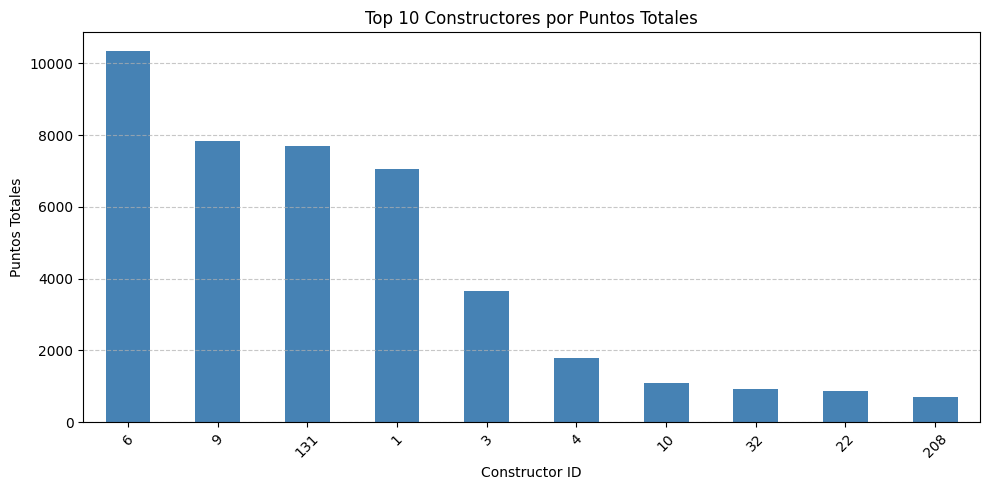


Status únicos:
['\\N' 'D']


In [69]:
constructor_results = pd.read_csv('../data/original/constructor_results.csv')

print("Primeras 5 filas:")
display(constructor_results.head())

print("\nColumnas: ")
print(constructor_results.columns.tolist())

print(f"Registros: {constructor_results.shape[0]}")

#Distribución de puntos por constructor
top_n = 10
points_by_constructor = constructor_results.groupby('constructorId')['points'].sum().sort_values(ascending=False)
top_constructors = points_by_constructor.head(top_n)

plt.figure(figsize=(10, 5))
top_constructors.plot(kind='bar', color='steelblue')
plt.title(f'Top {top_n} Constructores por Puntos Totales')
plt.xlabel('Constructor ID')
plt.ylabel('Puntos Totales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Estados
print("\nStatus únicos:")
print(constructor_results['status'].unique())

### Anàlisis del archivo `constructor_results.csv`

1. ¿Qué nos proporciona este archivo?

Este archivo contiene los resultados por carrera para cada constructor, con información clave:

- `constructorResultsId`: ID único del resultado
- `raceId`: ID de la carrera
- `constructorId`: ID del constructor
- `points`: Puntos obtenidos
- `status`: Estado del resultado (hay nulos o vacíos)

2. ¿Qué columnas son importantes para predicciones?

- `raceId` y `constructorId`: Foreigns Keys para otros datasets
- `points`: Variable objetivo
- `status`: Si se completa, ayuda a saber si el coche terminó

3. ¿Qué predicciones se pueden hacer?

Archivo fundamental para modelar el **rendimiento de cada escudería.**

- Predicción de puntos por constructor en una carrera.
- Comparar que escudería tiene mejor rendimiento por circuito


## Constructor_standings.csv

In [70]:
standings = pd.read_csv('../data/original/constructor_standings.csv')
print("Primeras 5 filas:")
display(standings.head())
print("\nColumnas: ")

print(standings.columns.tolist())
print(f"Registros: {standings.shape[0]}")
print(f"Columnas: {standings.shape[1]}")

Primeras 5 filas:


,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0



Columnas: 
['constructorStandingsId', 'raceId', 'constructorId', 'points', 'position', 'positionText', 'wins']
Registros: 13391
Columnas: 7


### Anàlisis archivo `constructor_standing.csv`

1. ¿Qué nos proporciona este archivo?

Este dataset ofrece la clasificación de constructores tras cada carrera, es decir, cómo se posiciona cada escudería en el campeonate de constructores en un momento dado.

Las columnas principales son:

- `constructorStandingsId`: ID único del registro de clasificación.
- `raceId`: ID de la carrera
- `constructorId`: ID de la escudería
- `points`: Puntos acumulados del cosntructor
- `position`: Posición numérica
- `positionText`: Respresentación textual
- `wins`: Total de victorias del constructor hasta esa carrera

2. ¿Qué columnas son importantes?

- `raceId` y `constructorId`: Foreign keys hacia otras tablas
- `points`: Reflejan el rendimiento acumulado
- `position`: Posición del constructor en el campeonato
- `wins`: Número de victorias totales.

3. ¿Qué predicciones se pueden hacer?

- Classificación final de constructores al final de la temporada.
- Probabilidad de que un constructor gane el campeonato
- Proyección de puntos en carreras futuras.
- Análisis de evolución en el campeonato carrera a carrera.

## Constructors & Drivers .csv

In [71]:
constructors = pd.read_csv('../data/original/constructors.csv')
print("Primeras 5 filas:")
display(constructors.head())
print("\nColumnas: ")
print(constructors.columns.tolist())
print(f"Registros: {constructors.shape[0]}")
print(f"Columnas: {constructors.shape[1]}")

drivers = pd.read_csv('../data/original/drivers.csv')
print("Primeras 5 filas:")
display(drivers.head())
print("\nColumnas: ")
print(drivers.columns.tolist())
print(f"Registros: {drivers.shape[0]}")
print(f"Columnas: {drivers.shape[1]}")


Primeras 5 filas:


,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso



Columnas: 
['constructorId', 'constructorRef', 'name', 'nationality', 'url']
Registros: 212
Columnas: 5
Primeras 5 filas:


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen



Columnas: 
['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob', 'nationality', 'url']
Registros: 861
Columnas: 9


### Anàlisis

Estos dataset són informativos sobre todas las escuderías y pilotos que hay.

## Lap_times.csv

Primeras 5 filas:


,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342



Columnas: 
['raceId', 'driverId', 'lap', 'position', 'time', 'milliseconds']
Registros: 589081
Columnas: 6


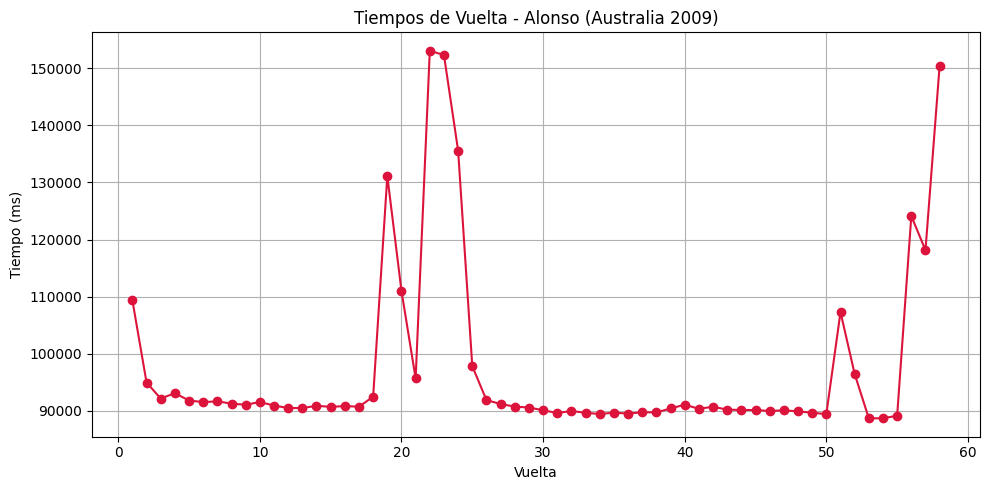

In [72]:
lap_times = pd.read_csv('../data/original/lap_times.csv')
print("Primeras 5 filas:")
display(lap_times.head())
print("\nColumnas: ")
print(lap_times.columns.tolist())
print(f"Registros: {lap_times.shape[0]}")
print(f"Columnas: {lap_times.shape[1]}")

#Tiempos de vuelta de Alonso en Australia
driver_id = 4 #Alonso
race_id = 1 #Australia 2009
laps = lap_times[(lap_times['driverId'] == driver_id) & (lap_times['raceId'] == race_id)]

plt.figure(figsize=(10,5))
plt.plot(laps['lap'], laps['milliseconds'], marker='o', linestyle='-', color='crimson')
plt.title('Tiempos de Vuelta - Alonso (Australia 2009)')
plt.xlabel('Vuelta')
plt.ylabel('Tiempo (ms)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Anàlis archivo `lap_times.csv`

1. ¿Qué nos proporciona este archivo?

Contiene los tiempos por vuelta de cada pilota en cada carrera. Visualiza el rendimiento en carrera, consistencia, estrategias de ritmo...

Importante decir que la columna `milliseconds` es para cálculos i la columna `time` es solo textual.

2. ¿Qué columnas son importantes para predicciones?

- `milliseconds`: Permite trabajar numéricamente
- `lap`: Útil para la evolución de ritmo
- `position`: Ayuda a saber si el piloto estaba en tràfico, liderando...

3. ¿Qué predicciones se pueden hacer?

- Tiempo de vuelta estimado en una vuelta dada
- Detección de undercat/overcut
- Clasificar stints y degradación
- Predicción del rendimiento en carrera

## Pit_stops.csv

Primeras 5 filas:


,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842



Columnas: 
['raceId', 'driverId', 'stop', 'lap', 'time', 'duration', 'milliseconds']
Registros: 11371
Columnas: 7


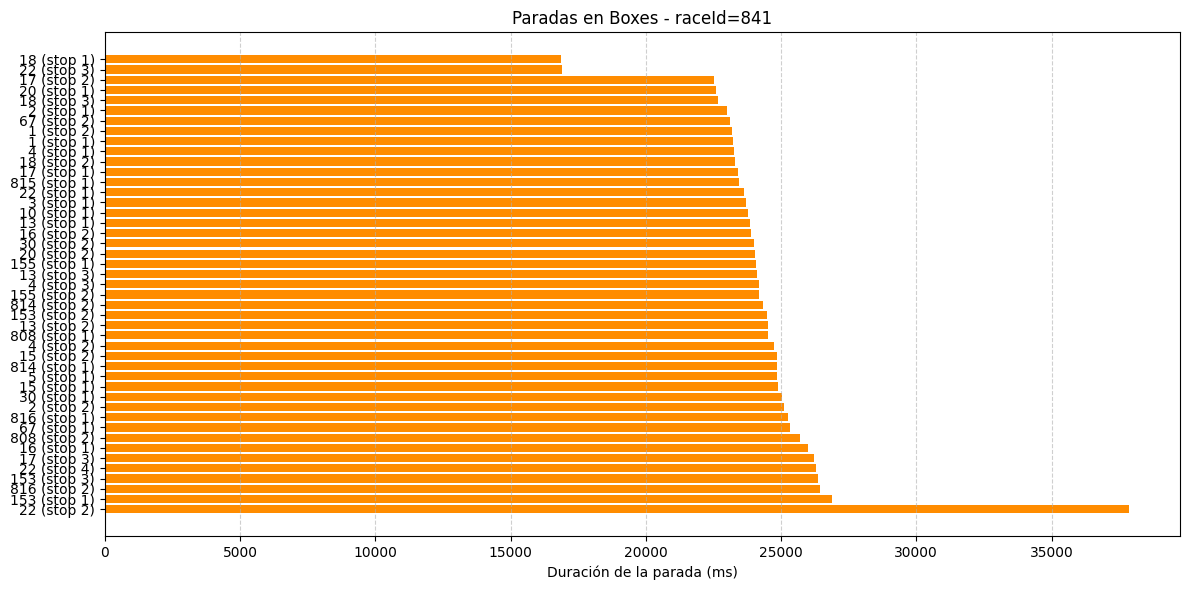

In [73]:
pit_stops = pd.read_csv('../data/original/pit_stops.csv')
print("Primeras 5 filas:")
display(pit_stops.head())
print("\nColumnas: ")
print(pit_stops.columns.tolist())
print(f"Registros: {pit_stops.shape[0]}")
print(f"Columnas: {pit_stops.shape[1]}")

#Por carrera 
race_id = 841
pits = pit_stops[pit_stops['raceId'] == race_id]
pits_sorted = pits.sort_values(by='milliseconds', ascending=False)
pits_sorted['label'] = pits_sorted['driverId'].astype(str) + " (stop " + pits_sorted['stop'].astype(str) + ")"


plt.figure(figsize=(12,6))
plt.barh(pits_sorted['label'], pits_sorted['milliseconds'], color='darkorange')
plt.xlabel('Duración de la parada (ms)')
plt.title(f'Paradas en Boxes - raceId={race_id}')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


### Anàlisis `pits_stops.csv`

1. ¿Qué nos proporciona este archivo?

En detalla cada parada en boxes por piloto, carrera a carrera.

- `stop`: Número de para (1a, 2a, etc)
- `lap`: Vuelta en la que se realizó la parada
- `time`: Hora de la parada (hh:mm:ss)
- `duration`: Duración de la parada (texto)
- `milliseconds`: Duración de la parada en ms.

2. ¿Qué columnas son importantes para predicciones?

- `lap`, `duration`, `millisecons`, `stop` i `raceId`. 

3. ¿Qué predicciones se pueden hacer?

- Predecir la vuelta óptima de parada.
- Classificar si una parada fue "buena", "normal" o "lenta".
- Predecir número total de paradas por piloto o carrera.
- Detectar undercut

## Qualyfing.csv

Primeras 5 filas:


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236



Columnas: 
['qualifyId', 'raceId', 'driverId', 'constructorId', 'number', 'position', 'q1', 'q2', 'q3']
Registros: 10494
Columnas: 9


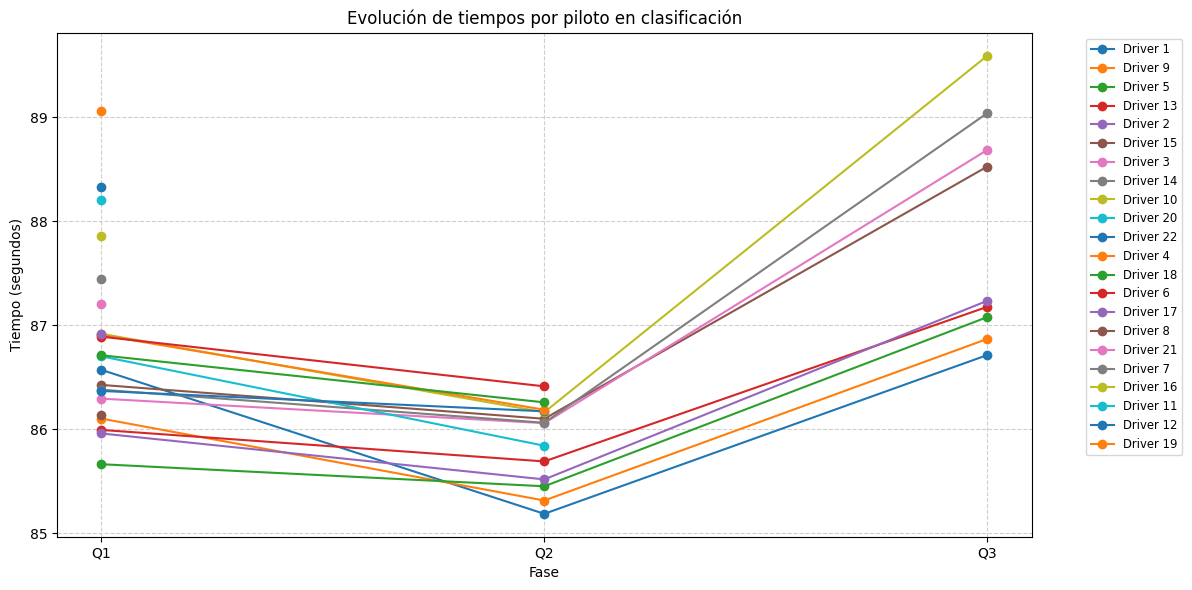

In [74]:
qualifying = pd.read_csv('../data/original/qualifying.csv')
print("Primeras 5 filas:")
display(qualifying.head())
print("\nColumnas: ")
print(qualifying.columns.tolist())
print(f"Registros: {qualifying.shape[0]}")
print(f"Columnas: {qualifying.shape[1]}")

race_id = 18
quali = qualifying[qualifying['raceId'] == race_id].copy()

def time_to_sec(t):
    try:
        m, s = map(float, t.split(':'))
        return m * 60 + s
    except:
        return None

for col in ['q1', 'q2', 'q3']:
    quali[col + '_sec'] = quali[col].apply(time_to_sec)
    
plt.figure(figsize=(12, 6))
for _, row in quali.iterrows():
    tiempos = [row['q1_sec'], row['q2_sec'], row['q3_sec']]
    fases = ['Q1', 'Q2', 'Q3']
    plt.plot(fases, tiempos, marker='o', label=f'Driver {row["driverId"]}')

plt.title('Evolución de tiempos por piloto en clasificación')
plt.xlabel('Fase')
plt.ylabel('Tiempo (segundos)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

    

### Análisis `qualifying.csv`

1. ¿Qué nos proporciona este archivo?

Resultados de la sesión de clasificación (Q1, Q2, Q3) por piloto y carrera.


2. ¿Qué columnas son importantes para predicciones?

- `position`, `q1, q2 i q3`

3. ¿Qué predicciones se pueden hacer?

- Posición de salida a partir de otros datos
- Relación entre posición de salida y posición final
- Estimar si un piloto pasará a Q2 o Q3.

## Races Seasons .csv

Primeras 5 filas:


,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N



Columnas: 
['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time']
Registros: 1125
Columnas: 18


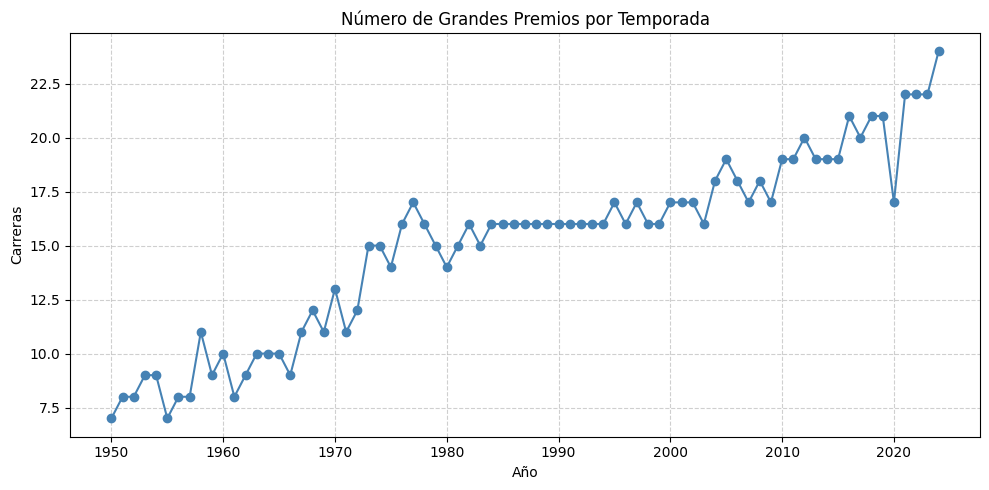

Primeras 5 filas:


,year,url
0,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...
1,2008,http://en.wikipedia.org/wiki/2008_Formula_One_...
2,2007,http://en.wikipedia.org/wiki/2007_Formula_One_...
3,2006,http://en.wikipedia.org/wiki/2006_Formula_One_...
4,2005,http://en.wikipedia.org/wiki/2005_Formula_One_...



Columnas: 
['year', 'url']
Registros: 75
Columnas: 2


In [75]:
races = pd.read_csv('../data/original/races.csv')
print("Primeras 5 filas:")
display(races.head())
print("\nColumnas: ")
print(races.columns.tolist())
print(f"Registros: {races.shape[0]}")
print(f"Columnas: {races.shape[1]}")

races_per_year = races.groupby('year')['raceId'].count()

plt.figure(figsize=(10, 5))
races_per_year.plot(marker='o', color='steelblue')
plt.title('Número de Grandes Premios por Temporada')
plt.xlabel('Año')
plt.ylabel('Carreras')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


seasons = pd.read_csv('../data/original/seasons.csv')
print("Primeras 5 filas:")
display(seasons.head())
print("\nColumnas: ")
print(seasons.columns.tolist())
print(f"Registros: {seasons.shape[0]}")
print(f"Columnas: {seasons.shape[1]}")


### Análisis `races.csv` i `seasons.csv`

1. ¿Qué nos proporcionan los archivos?

Información de cada Gran Premio y todas las temporadas. El fichero seasons.csv no es muy útil.

2. ¿Qué columnas son útiles para predicciones?

- `year, round, date, time, quali_time`

3. ¿Qué predicciones se pueden hacer?

- Influye la posición de la parrilla según el circuito y año?
- Cambios de estrategia por orden de carrera
- Influencia según el horario?

## Resuls, Sprint Results i Status.csv

In [76]:
results = pd.read_csv('../data/original/results.csv')
print("Primeras 5 filas:")
display(results.head())
print("\nColumnas: ")
print(results.columns.tolist())
print(f"Registros: {results.shape[0]}")
print(f"Columnas: {results.shape[1]}")

sprint_results = pd.read_csv('../data/original/sprint_results.csv')
print("Primeras 5 filas:")
display(sprint_results.head())
print("\nColumnas: ")
print(sprint_results.columns.tolist())
print(f"Registros: {sprint_results.shape[0]}")
print(f"Columnas: {sprint_results.shape[1]}")

status = pd.read_csv('../data/original/status.csv')
print("Primeras 5 filas:")
display(status.head())
print("\nColumnas: ")
print(status.columns.tolist())
print(f"Registros: {status.shape[0]}")
print(f"Columnas: {status.shape[1]}")

Primeras 5 filas:


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1



Columnas: 
['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid', 'position', 'positionText', 'positionOrder', 'points', 'laps', 'time', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId']
Registros: 26759
Columnas: 18
Primeras 5 filas:


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1



Columnas: 
['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid', 'position', 'positionText', 'positionOrder', 'points', 'laps', 'time', 'milliseconds', 'fastestLap', 'fastestLapTime', 'statusId']
Registros: 360
Columnas: 16
Primeras 5 filas:


,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine



Columnas: 
['statusId', 'status']
Registros: 139
Columnas: 2


### Análisis de los archivos

1. ¿Qué nos proporciona este archivo?

Información sobre resultados de las carreras para cada piloto i el estado en la que terminó.

2. ¿Qué columnas son importantes para predicciones?

- `positionOrder, points, grid, laps, fastestLapTime...`

3. ¿Qué se puede predecir? 

- ¿Donde terminará un piloto?
- ¿Cuántos puntos hará?
- ¿Quién hará la vuelta rápida?
- ¿Abandonará la carrera DNF?